### Explore mixed layer and perfrom linear regression

#### ML was sliced in inidivual cast processing (22-23.3) and then refined by taking the CTD values for the chl fluorescence max within that range (between 0-46 m depth). For each cast, these were arranged in an Excel sheet. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import style
import datetime
from sklearn.linear_model import LinearRegression


import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [2]:
cd ~/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804/

/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804


In [3]:
p2_ml = pd.read_csv("p2_2018_ml_max.csv", parse_dates = ['StartTime'])

p2_ml = p2_ml.set_index('StartTime')

# rename oxygen so there's no backslash
p2_ml.rename(columns = {'sbox0Mm/Kg':'sbox0MmKg'}, inplace = True)

p2_ml.head()

,Cast,timeS,scan,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,...,par,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0MmKg,sbeox0PS,Time
StartTime,,,,,,,,,,,,,,,,,,,,,
2018-04-15 05:12:33,42,150.700,3618,-107.00062,16.90048,35,23.5097,23.5071,5.061912,5.061679,...,0.050671,2.5959,34.3013,34.3016,23.2584,23.2594,6.3533,194.030,91.089,2018-04-15 05:15:03.700000
2018-04-15 15:06:02,43,246.625,5920,-107.01704,16.91626,39,23.8689,23.8595,5.113345,5.112134,...,65.830000,2.6921,34.4120,34.4101,23.2373,23.2386,6.6025,201.644,95.316,2018-04-15 15:10:08.625000
2018-04-15 22:01:43,44,316.669,7601,-107.01528,16.92708,41,23.6572,23.6597,5.090077,5.090155,...,39.573000,2.6816,34.3991,34.3978,23.2898,23.2881,6.5941,201.378,94.838,2018-04-15 22:06:59.669000
2018-04-16 15:03:02,45,180.978,4344,-107.03418,16.94377,37,23.3999,23.3951,5.049821,5.049274,...,28.010000,2.5522,34.2938,34.2932,23.2848,23.2857,6.2610,191.208,89.591,2018-04-16 15:06:02.978000
2018-04-17 15:03:16,46,154.913,3719,-107.06274,16.97818,37,23.4162,23.4155,5.052308,5.051857,...,57.672000,2.5675,34.3000,34.2972,23.2848,23.2828,6.3243,193.138,90.525,2018-04-17 15:05:50.913000


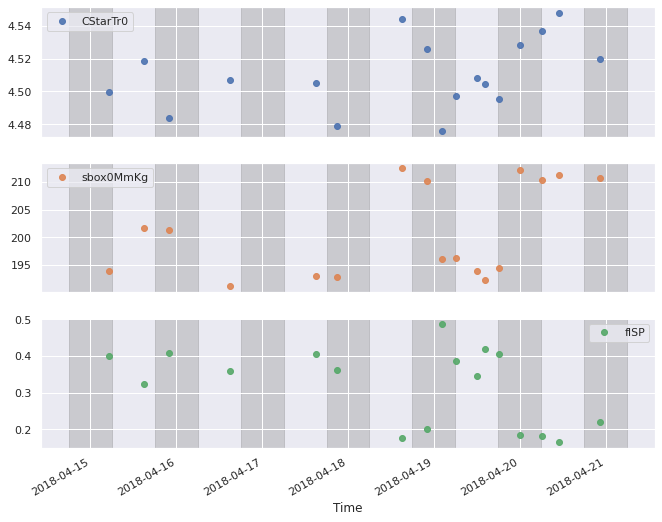

In [4]:
# Visualize the time series


# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Plot O2
cols_plot = ['CStarTr0', 'sbox0MmKg', 'flSP']

axes = p2_ml[cols_plot].plot(marker='o', alpha=0.9, linestyle='None', figsize=(11, 9), subplots=True, \
                              sharex = True, sharey = False)
for ax in axes:
    ax.set_ylabel('')
    ax.set_xlabel('Time')
    
    
for ax in axes:
    ax.axvspan('2018-04-14 18-00-00','2018-04-15 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-15 18-00-00','2018-04-16 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-16 18-00-00','2018-04-17 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-17 18-00-00','2018-04-18 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .3, zorder = -1)

model = LinearRegression()
#model.fit('StartTime', 'CStarTr0')

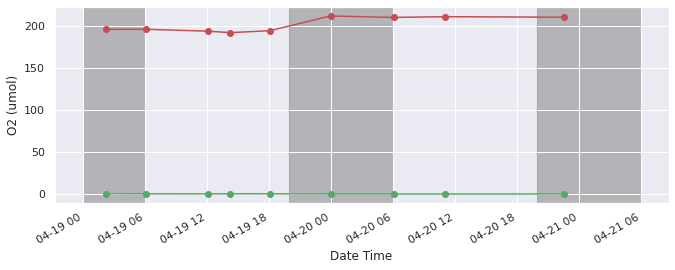

In [5]:
# Visualize the time series

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# reshape the data
x = p2_ml.index.values.reshape(-1,1)
y = p2_ml.sbox0MmKg.values.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

ax = p2_ml.loc['2018-04-19':'2018-04-20', 'sbox0MmKg'].plot(marker='o', color = 'r', linestyle='-')
#ax = p2_ml.loc['2018-04-19':'2018-04-20', 'CStarTr0'].plot(marker='o', color = 'b', linestyle='-')
ax = p2_ml.loc['2018-04-19':'2018-04-20', 'flSP'].plot(marker='o', color = 'g', linestyle='-')

### Shade in sundown to sunup

# 20%-grey rectangle spanning the x axis width from the nighttime hours
ax.axvspan('2018-04-19 00-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 20-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 20-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

### Trying to get regression model plotted

#x_new = np.linspace('2018-04-23 00-00-00', '2018-04-23 06-00-00')
#y_new = model.predict(x_new[:, np.newaxis])

#print(regression.predict([[2018-4-22]]))

#x_new = 2018-4-22
#y_new = regression.predict([[2018-4-22]])
#y_new = 1.3

#ax.plot(x_new, y_new)

ax.set_xlabel('Date Time')
ax.set_ylabel('O2 (umol)')

ax.axis('tight')

plt.show()

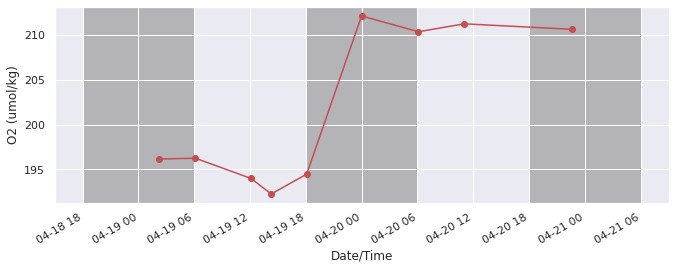

In [6]:
ax = p2_ml.loc['2018-04-19':'2018-04-20', 'sbox0MmKg'].plot(marker='o', color = 'r', linestyle='-')

ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

ax.set_xlabel('Date/Time')
ax.set_ylabel('O2 (umol/kg)');